In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import pandas as pd
data = []
labels = []
classes = 10
cur_path = './Dataset/'

#Retrieving the images and their labels
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((50,50))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
            # exit()

#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape)

(570, 50, 50, 3)


In [4]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=9)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

(570, 50, 50, 3) (570,)
(456, 50, 50, 3) (114, 50, 50, 3) (456,) (114,)


In [5]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(10, activation='softmax'))

#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 42, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 21, 21, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 21, 21, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 19, 19, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 17, 17, 64)        36928     
                                                      

In [7]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("handgesture_model.h5")

Epoch 1/15
15/15 [==============================] - 6s 275ms/step - loss: 16.3016 - accuracy: 0.1491 - val_loss: 2.1865 - val_accuracy: 0.2456
Epoch 2/15
15/15 [==============================] - 6s 381ms/step - loss: 2.0894 - accuracy: 0.3004 - val_loss: 1.7625 - val_accuracy: 0.5965
Epoch 3/15
15/15 [==============================] - 6s 390ms/step - loss: 1.3296 - accuracy: 0.5570 - val_loss: 0.4671 - val_accuracy: 0.8684
Epoch 4/15
15/15 [==============================] - 5s 335ms/step - loss: 0.6742 - accuracy: 0.7719 - val_loss: 0.3757 - val_accuracy: 0.9123
Epoch 5/15
15/15 [==============================] - 4s 265ms/step - loss: 0.4462 - accuracy: 0.8421 - val_loss: 0.2435 - val_accuracy: 0.9211
Epoch 6/15
15/15 [==============================] - 4s 267ms/step - loss: 0.2944 - accuracy: 0.9035 - val_loss: 0.1921 - val_accuracy: 0.9474
Epoch 7/15
15/15 [==============================] - 4s 280ms/step - loss: 0.2325 - accuracy: 0.9408 - val_loss: 0.1723 - val_accuracy: 0.9474
Epoch

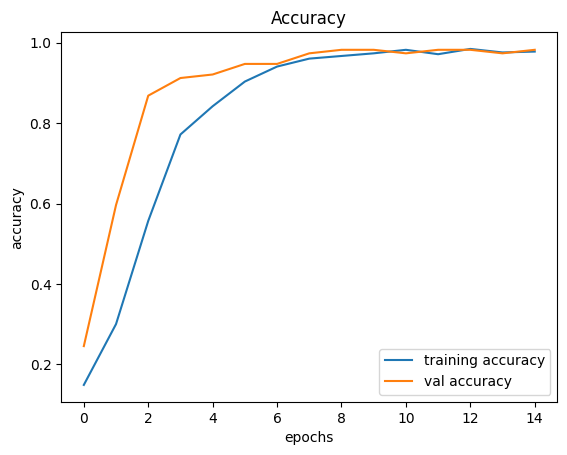

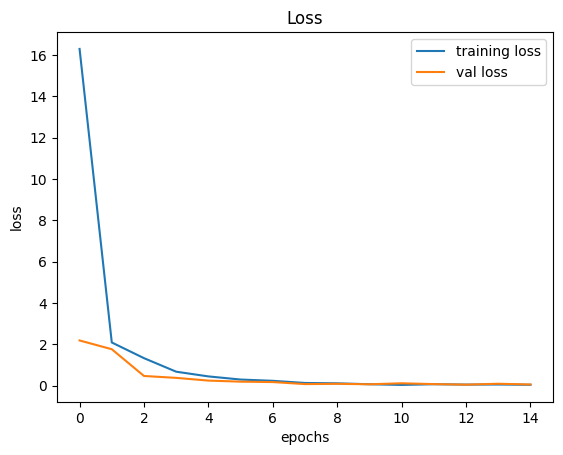

In [8]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [15]:
from sklearn.metrics import accuracy_score
test_folder = './Dataset/'
data_test = []
labels_test = []
classes = 10

for i in range(classes):
    path = os.path.join(test_folder,'test',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((50,50))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data_test.append(image)
            labels_test.append(i)
        except:
            print("Error loading image")
            # exit()

#Converting lists into numpy arrays
X_test = np.array(data_test)
y_test = np.array(labels_test)

# Dự đoán nhãn với mô hình
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
# # Tính toán độ chính xác
# accuracy = np.mean(y_pred = y_test)
# print("Accuracy: ", accuracy)
# print(accuracy_score(y_test, y_pred))
accuracy_score(y_test, y_pred)

5/5 [==============================] - 1s 28ms/step


0.9769230769230769